In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rater1 = pd.read_csv('C:\Projetos\Bunch Challenge\morale_rater1.csv')

In [3]:
rater2 = pd.read_csv('C:\Projetos\Bunch Challenge\morale_rater2.csv')

In [4]:
rater1.columns

Index(['Unnamed: 0', 'message_timestamp', 'text', 'high_morale', 'low_morale'], dtype='object')

In [5]:
rater1.rename(columns={'Unnamed: 0': 'Id', 'message_timestamp': 'message_timestamp_r1',
                       'text': 'text_r1', 'high_morale': 'high_morale_r1', 
                       'low_morale': 'low_morale_r1'}, inplace=True)
rater1.columns

Index(['Id', 'message_timestamp_r1', 'text_r1', 'high_morale_r1',
       'low_morale_r1'],
      dtype='object')

In [6]:
rater2.rename(columns={'Unnamed: 0': 'Id', 'message_timestamp': 'message_timestamp_r2',
                       'text': 'text_r2', 'high_morale': 'high_morale_r2', 
                       'low_morale': 'low_morale_r2'}, inplace=True)
rater2.columns

Index(['Id', 'message_timestamp_r2', 'text_r2', 'high_morale_r2',
       'low_morale_r2'],
      dtype='object')

In [7]:
#Merge 2 dataframes 
df_merged = rater1.merge(rater2, on = ['Id'], how = 'inner')
print(len(df_merged))
df_merged[:3]

300


,Id,message_timestamp_r1,text_r1,high_morale_r1,low_morale_r1,message_timestamp_r2,text_r2,high_morale_r2,low_morale_r2
0,0,2016-11-15 11:05:17,nothing is running on the box,0,0,2016-11-15 11:05:17,nothing is running on the box,0,0
1,1,2016-07-16 09:22:11,no its not :slightly_smiling_face: thanks agai...,1,0,2016-07-16 09:22:11,no its not :slightly_smiling_face: thanks agai...,1,0
2,2,2018-03-06 10:07:14,Kyle Lindeque [12:06 PM]\nTry looking towards ...,0,0,2018-03-06 10:07:14,Kyle Lindeque [12:06 PM]\nTry looking towards ...,0,0


In [8]:
# Insert columns high_morale_sum and low_morale_sum
df_merged['high_morale_sum'] = np.where((rater1['high_morale_r1'] == 1) 
                                        & (rater2['high_morale_r2'] == 1), 2, 0)
df_merged['low_morale_sum'] = np.where((rater1['low_morale_r1'] == 1) 
                                       & (rater2['low_morale_r2'] == 1), 2, 0)
df_merged.head(3)

,Id,message_timestamp_r1,text_r1,high_morale_r1,low_morale_r1,message_timestamp_r2,text_r2,high_morale_r2,low_morale_r2,high_morale_sum,low_morale_sum
0,0,2016-11-15 11:05:17,nothing is running on the box,0,0,2016-11-15 11:05:17,nothing is running on the box,0,0,0,0
1,1,2016-07-16 09:22:11,no its not :slightly_smiling_face: thanks agai...,1,0,2016-07-16 09:22:11,no its not :slightly_smiling_face: thanks agai...,1,0,2,0
2,2,2018-03-06 10:07:14,Kyle Lindeque [12:06 PM]\nTry looking towards ...,0,0,2018-03-06 10:07:14,Kyle Lindeque [12:06 PM]\nTry looking towards ...,0,0,0,0


In [9]:
# How many times do the raters agree on high_morale?
count_high = df_merged.high_morale_sum[df_merged.high_morale_sum==2].value_counts()
count_high

2    20
Name: high_morale_sum, dtype: int64

In [10]:
# how many times does Rater1 labeled high morale?
high_morale_rater1 = rater1[(rater1["high_morale_r1"] == 1)]
len(high_morale_rater1)

31

In [11]:
# how many times does Rater2 labeled high morale?
high_morale_rater2 = rater2[(rater2["high_morale_r2"] == 1)]
len(high_morale_rater2)

38

In [12]:
# How many times do the raters agree on low_morale?
count_low = df_merged.low_morale_sum[df_merged.low_morale_sum==2].value_counts()
count_low

2    3
Name: low_morale_sum, dtype: int64

In [13]:
# how many times does Rater1 labeled low morale?
low_morale_rater1 = rater1[(rater1["low_morale_r1"] == 1)]
len(low_morale_rater1)

4

In [14]:
# how many times does Rater2 labeled low morale?
low_morale_rater2 = rater2[(rater2["low_morale_r2"] == 1)]
len(low_morale_rater2)

18

In [15]:
# is there any time that Rater1 labeled high morale and Rater2 labeled low morale in the same statement? or vice-versa?
df_merged.loc[((df_merged['high_morale_r1'] == 1) & (df_merged['low_morale_r2'] == 1)) 
              | ((df_merged['low_morale_r1'] == 1) & (df_merged['high_morale_r2'] == 1))]

,Id,message_timestamp_r1,text_r1,high_morale_r1,low_morale_r1,message_timestamp_r2,text_r2,high_morale_r2,low_morale_r2,high_morale_sum,low_morale_sum
229,229,2017-06-23 16:49:02,"it is still not 100% perfect, feels a little s...",1,0,2017-06-23 16:49:03,"it is still not 100% perfect, feels a little s...",0,1,0,0


In [16]:
# Agreements on neutral (times that rater1 and rater2 labeled the same message as neutral)
neutral_agreements = df_merged.loc[((df_merged['high_morale_r1'] == 0) & (df_merged['high_morale_r2'] == 0))
             & ((df_merged['low_morale_r1'] == 0) & (df_merged['low_morale_r2'] == 0))]
len(neutral_agreements)

233

In [17]:
#Global agreements (times that rater1 and rater2 agree in general - neutral+hm+lm):
global_agreements = len(neutral_agreements) + count_high + count_low
global_agreements

2    256
dtype: int64

In [18]:
#Global agreements (times that rater1 and rater2 disagree in general - neutral+hm+lm):
global_disagreements = 300 - global_agreements
global_disagreements

2    44
dtype: int64

In [19]:
#what is the total labeled as hm by rater1 and/or rater2 in 300 messages?
high_morale_total = df_merged.loc[((df_merged['high_morale_r1'] == 1) | (df_merged['high_morale_r2'] == 1))]
len(high_morale_total)

49

In [20]:
#Then create new variables to indicate whether the raters agree or disagree. 
#On how many messages do the raters agree? Please answer for both variables.

# Disagreements when labeling high morale:
hm_disagreements = df_merged.loc[((df_merged['high_morale_r1'] == 0) & (df_merged['high_morale_r2'] == 1))
             | ((df_merged['high_morale_r1'] == 1) & (df_merged['high_morale_r2'] == 0))]
hm_disagreements[:3]

,Id,message_timestamp_r1,text_r1,high_morale_r1,low_morale_r1,message_timestamp_r2,text_r2,high_morale_r2,low_morale_r2,high_morale_sum,low_morale_sum
15,15,2017-01-13 15:27:18,lets do that. I would want us to make sure we ...,1,0,2017-01-13 15:27:18,lets do that. I would want us to make sure we ...,0,0,0,0
52,52,2016-05-24 11:09:38,Hmm... It stopped here... But I'm glad we're g...,1,0,2016-05-24 11:09:38,Hmm... It stopped here... But I'm glad we're g...,0,0,0,0
53,53,2017-06-23 16:50:05,we used a standard component :slightly_smiling...,0,0,2017-06-23 16:50:06,we used a standard component :slightly_smiling...,1,0,0,0


In [21]:
len(hm_disagreements)

29

In [22]:
# Disagreements when labeling low morale:
lm_disagreements = df_merged.loc[((df_merged['low_morale_r1'] == 0) & (df_merged['low_morale_r2'] == 1))
             | ((df_merged['low_morale_r1'] == 1) & (df_merged['low_morale_r2'] == 0))]
len(lm_disagreements)
print(f"{len(lm_disagreements)} times Rater1 and Rater2 disagreed in labeling low morale")

16 times Rater1 and Rater2 disagreed in labeling low morale


In [23]:
#what is the total labeled as lm by rater1 and/or rater2 in 300 messages?
low_morale_total = df_merged.loc[((df_merged['low_morale_r1'] == 1) | (df_merged['low_morale_r2'] == 1))]
len(low_morale_total)

19

In [24]:
# the message Id=229 is appearing in the count of both hm and lm because Rater1 labeled it as HM and Rater 2 labeled it as LM

In [25]:
#When the raters do not agree, how often does this happen?
# What is the percentage that was labeled as high morale in 300 messages?
percent_global_labeling_as_high_morale = (49*100) / 300
print(f"the percentage that was labeled as high morale by both raters was {round(percent_global_labeling_as_high_morale)}%")
percent_rater1_labeled_as_high_morale = (31*100) / 300
print(f"the percentage that Rater1 labeled as high morale was {round(percent_rater1_labeled_as_high_morale)}%")
percent_rater2_labeled_as_high_morale = (38*100) / 300
print(f"the percentage that Rater2 labeled as high morale was {round(percent_rater2_labeled_as_high_morale)}%")

the percentage that was labeled as high morale by both raters was 16%
the percentage that Rater1 labeled as high morale was 10%
the percentage that Rater2 labeled as high morale was 13%


In [26]:
# What is the percentage that was labeled as low morale:
percent_global_labeling_as_low_morale = (19*100) / 300
print(f"the percentage that was labeled as low morale by both raters was {round(percent_global_labeling_as_low_morale)}%")
percent_rater1_labeled_as_low_morale = (4*100) / 300
print(f"the percentage that Rater1 labeled as low morale was {round(percent_rater1_labeled_as_low_morale)}%")
percent_rater2_labeled_as_low_morale = (18*100) / 300
print(f"the percentage that Rater2 labeled as low morale was {round(percent_rater2_labeled_as_low_morale)}%")

the percentage that was labeled as low morale by both raters was 6%
the percentage that Rater1 labeled as low morale was 1%
the percentage that Rater2 labeled as low morale was 6%


In [27]:
# What is the percentage of low morale agreements/disagreements? 
percent_agreement_low_morale = (3*100) / 19
print(f"Rater1 and Rater2 agreed in labeling low morale in {round(percent_agreement_low_morale)}%  of the times ")
percent_disagreement_low_morale = (16*100) / 19
print(f"Rater1 and Rater2 disagreed in labeling low morale in {round(percent_disagreement_low_morale)}%  of the times ")

Rater1 and Rater2 agreed in labeling low morale in 16%  of the times 
Rater1 and Rater2 disagreed in labeling low morale in 84%  of the times 


In [28]:
# What is the percentage of high morale agreements/disagreements? 
percent_agreement_high_morale = (20*100) / 49
print(f"Rater1 and Rater2 agreed in labeling high morale in {round(percent_agreement_high_morale)}%  of the times ")
percent_disagreement_high_morale = (29*100) / 49
print(f"Rater1 and Rater2 disagreed in labeling high morale in {round(percent_disagreement_high_morale)}%  of the times ")

Rater1 and Rater2 agreed in labeling high morale in 41%  of the times 
Rater1 and Rater2 disagreed in labeling high morale in 59%  of the times 


In [29]:
#What is the percentage of total agreements/disagreements in labeling?
percent_global_agreements = (256*100) / 300
print(f"The percentage of global agreement in rating is {round(percent_global_agreements)}%")
percent_global_disagreements = (44*100) / 300
print(f"The percentage of global disagreement in rating is {round(percent_global_disagreements)}%")

The percentage of global agreement in rating is 85%
The percentage of global disagreement in rating is 15%


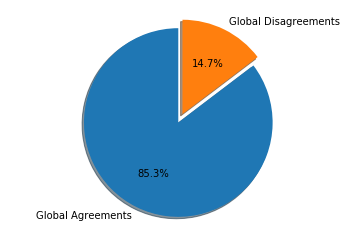

In [30]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Global Agreements', 'Global Disagreements'
sizes = [256, 44]
explode = (0.1, 0)  # only "explode" the 1nd slice (i.e. 'Global Agreements')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

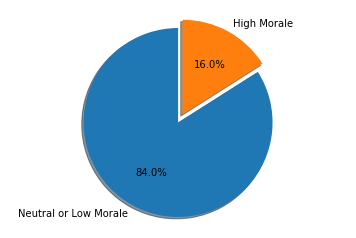

In [31]:
# Global Labeling High Morale
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral or Low Morale', 'High Morale'
sizes = [84, 16]
explode = (0.1, 0)  # only "explode" the 1nd slice (i.e. 'Global Agreements')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

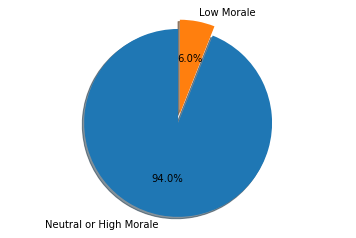

In [32]:
# Global Labeling Low Morale
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Neutral or High Morale', 'Low Morale'
sizes = [94, 6]
explode = (0.1, 0)  # only "explode" the 1nd slice (i.e. 'Global Agreements')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

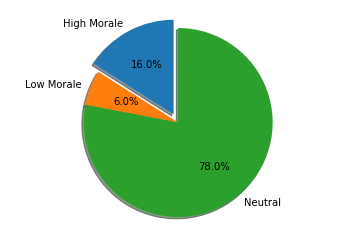

In [33]:
# Pie chart with 3 dimensions high, low, neutral (for total labeled)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'High Morale', 'Low Morale', 'Neutral'
sizes = [16, 6, 78]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

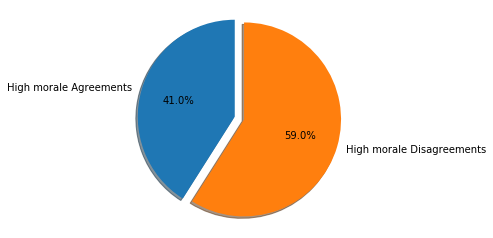

In [34]:
# Agree in labeling high morale in 41%  of the times 
# Disagree in labeling high morale in 59%  of the times
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'High morale Agreements', 'High morale Disagreements'
sizes = [41, 59]
explode = (0.1, 0)  # only "explode" the 1nd slice (i.e. 'Global Agreements')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

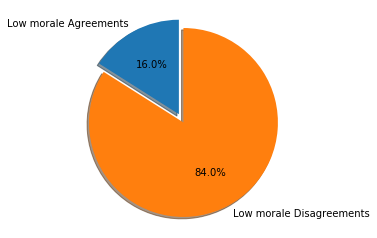

In [35]:
#Agree in labeling low morale in 16%  of the times 
#Disagree in labeling low morale in 84%  of the times
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Low morale Agreements', 'Low morale Disagreements'
sizes = [16, 84]
explode = (0.1, 0)  # only "explode" the 1nd slice (i.e. 'Global Agreements')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()